In [1]:
# Ward Tree

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
import networkx as nx
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from itertools import cycle
from matplotlib import cm
%matplotlib notebook
#%matplotlib inline
df = pd.read_csv('BUND2.csv',delimiter=",")
df.head()

C:\Users\40kmp\anaconda\envs\damir\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


,Regions,Population вensity per km2,Total population,Total population per 1k,"Regions, rus",Share of people with higher education. 2010. %,Median salary. 2019. rubles,Unemployment rate. 2017. %,Share of poor people. 2017. %,Gross regional product per capita. 2016. rubles,Terrorist_crimes_2017,Murders and attempted murders. 2017,Criminal possesion of weapons. 2017,Fertility rate. 2017,Museum attendance. 2010. per pop,"Share of people using internet everyday, 2016, %"
0,Adygea Republic,59.43,463088,463.088,Адыгея,20,23943,8.8,13.1,17450.16,0.40,0.31,1.26,1.52,0.197,40.1610
1,Altai Republic,2.37,220140,220.140,Республика Алтай,18,24872,12.0,25.1,18489.39,0.14,1.75,5.39,2.36,0.174,39.2334
2,Altai region,13.79,2317153,2317.153,Алтайский край,17,23480,6.9,17.8,18098.68,0.00,0.68,2.40,1.64,0.181,43.1501
3,Amurskaya Oblast,2.18,790044,790.044,Амурская область,18,40376,5.9,14.9,30784.41,0.02,1.42,5.00,1.71,0.649,44.0290
4,Arkhangelsk region,2.64,1092424,1092.424,Архангельская область,17,41030,6.5,14.1,32647.68,0.03,1.54,1.60,1.65,0.896,53.8225


<IPython.core.display.Javascript object>


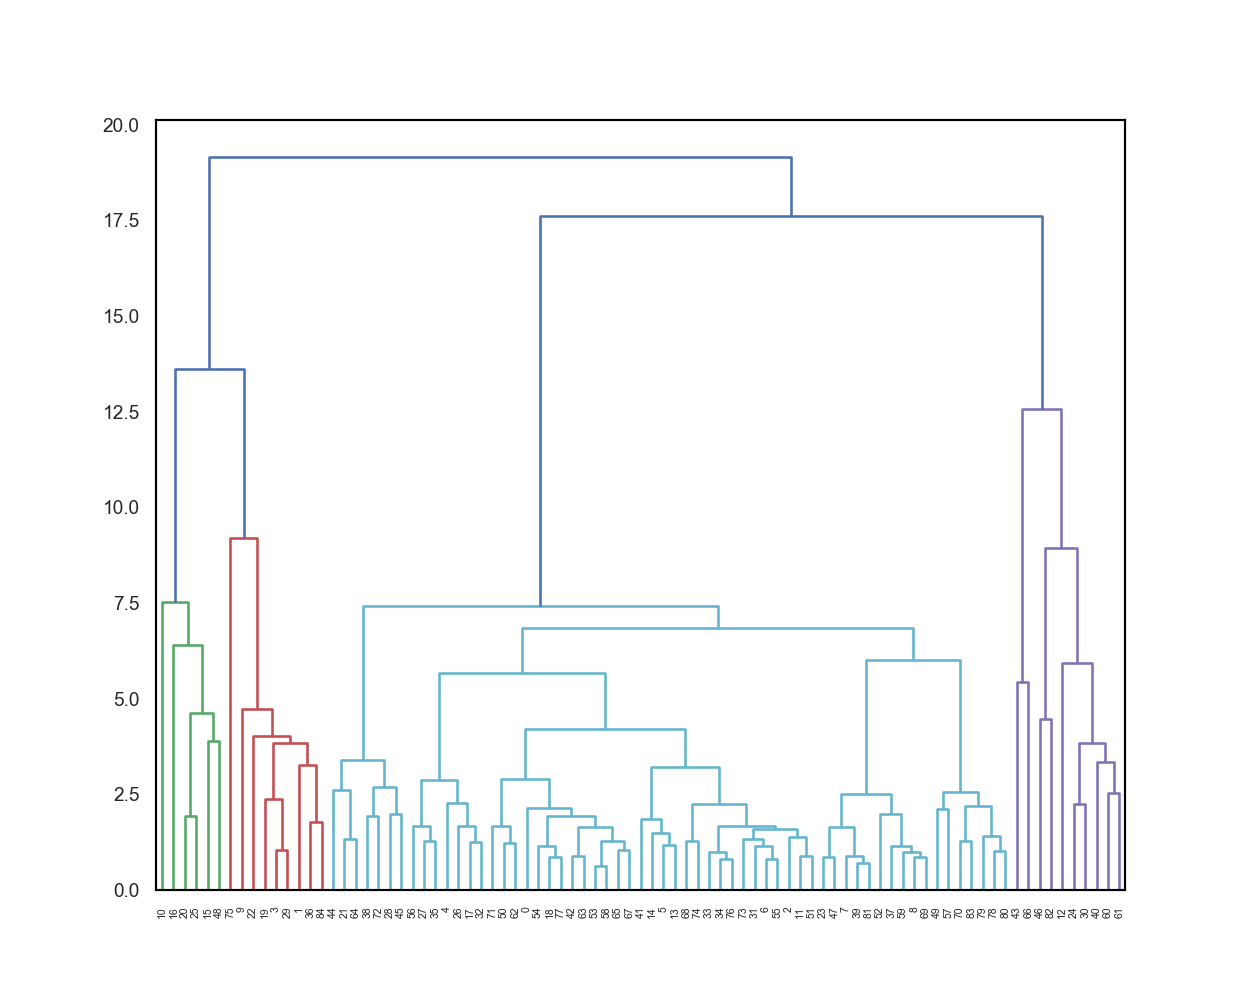

In [2]:
# ward tree
#plt.style.use("seaborn-muted")

import scipy.cluster.hierarchy as sch

X = np.zeros((85, 11))
X[:, 0] = df['Share of people with higher education. 2010. %'].to_numpy()
X[:, 1] = df['Median salary. 2019. rubles'].to_numpy()
X[:, 2] = df['Unemployment rate. 2017. %'].to_numpy()
X[:, 3] = df['Share of poor people. 2017. %'].to_numpy()
X[:, 4] = df['Gross regional product per capita. 2016. rubles'].to_numpy()
X[:, 5] = df['Terrorist_crimes_2017'].to_numpy()
X[:, 6] = df['Murders and attempted murders. 2017'].to_numpy()
X[:, 7] = df['Criminal possesion of weapons. 2017'].to_numpy()
X[:, 8] = df['Fertility rate. 2017'].to_numpy()
X[:, 9] = df['Museum attendance. 2010. per pop'].to_numpy()
X[:, 10] = df['Share of people using internet everyday, 2016, %'].to_numpy()

X[:, 0] -= X[:, 0].mean() # zero mean
X[:, 0] /= X[:, 0].std() # unit standard deviation

X[:, 1] -= X[:, 1].mean()
X[:, 1] /= X[:, 1].std() 

X[:, 2] -= X[:, 2].mean()
X[:, 2] /= X[:, 2].std() 

X[:, 3] -= X[:, 3].mean()
X[:, 3] /= X[:, 3].std() 

X[:, 4] -= X[:, 4].mean()
X[:, 4] /= X[:, 4].std() 

X[:, 5] -= X[:, 5].mean()
X[:, 5] /= X[:, 5].std() 

X[:, 6] -= X[:, 6].mean()
X[:, 6] /= X[:, 6].std() 

X[:, 7] -= X[:, 7].mean()
X[:, 7] /= X[:, 7].std() 

X[:, 8] -= X[:, 8].mean()
X[:, 8] /= X[:, 8].std() 

X[:, 9] -= X[:, 9].mean()
X[:, 9] /= X[:, 9].std() 

X[:, 10] -= X[:, 10].mean()
X[:, 10] /= X[:, 10].std() 

scaler = StandardScaler().fit(X)
new_x = scaler.transform(X)

plt.rcParams.update({"figure.figsize" : (10, 8),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})

dendrogram = sch.dendrogram(sch.linkage(new_x, method  = "ward"))
plt.show()

In [3]:
plt.style.use("seaborn-whitegrid")

<IPython.core.display.Javascript object>


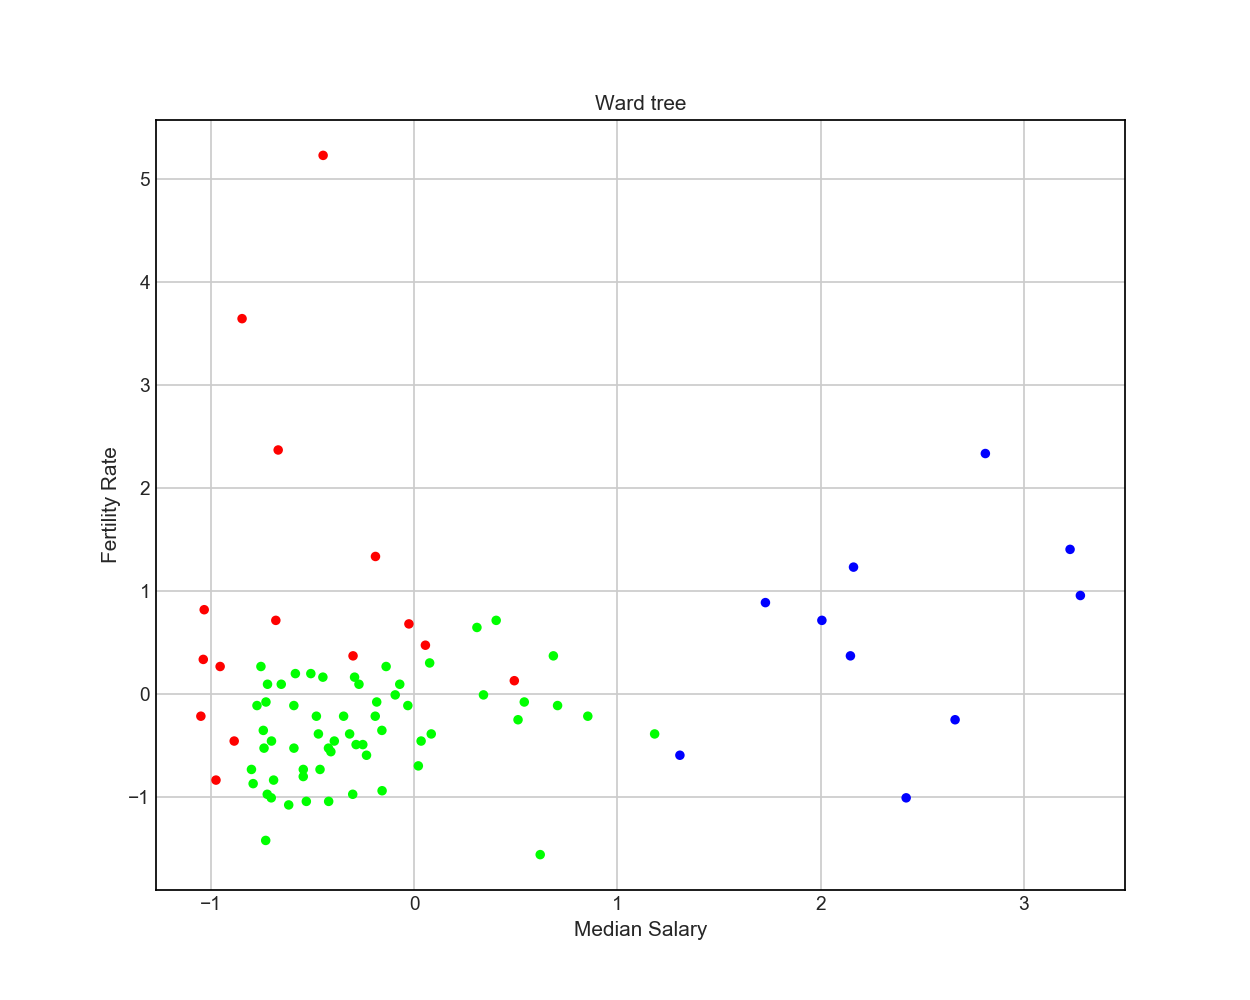

In [12]:
# ward tree continue

from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

y_hc=hc.fit_predict(new_x)

plt.rcParams.update({"figure.figsize" : (10, 8),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})

#plt.scatter(new_x[:, 1], new_x[:, 8], s=20, c=y_hc, cmap='brg')
plt.scatter(new_x[:, 1], new_x[:, 8], s=20, c=clll, cmap='brg')

plt.xlabel('Median Salary')
plt.ylabel('Fertility Rate')
plt.title('Ward tree')
plt.show()
#plt.savefig('ward tree.png')

In [6]:
# to rearrange colors
clll = y_hc

In [7]:
clll

array([2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       0, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0],
      dtype=int64)

In [8]:
clll_red = clll == 1
clll_blue = clll == 0

In [9]:
clll[clll_red] = 0
clll[clll_blue] = 1

In [10]:
clll

array([2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1],
      dtype=int64)

<IPython.core.display.Javascript object>


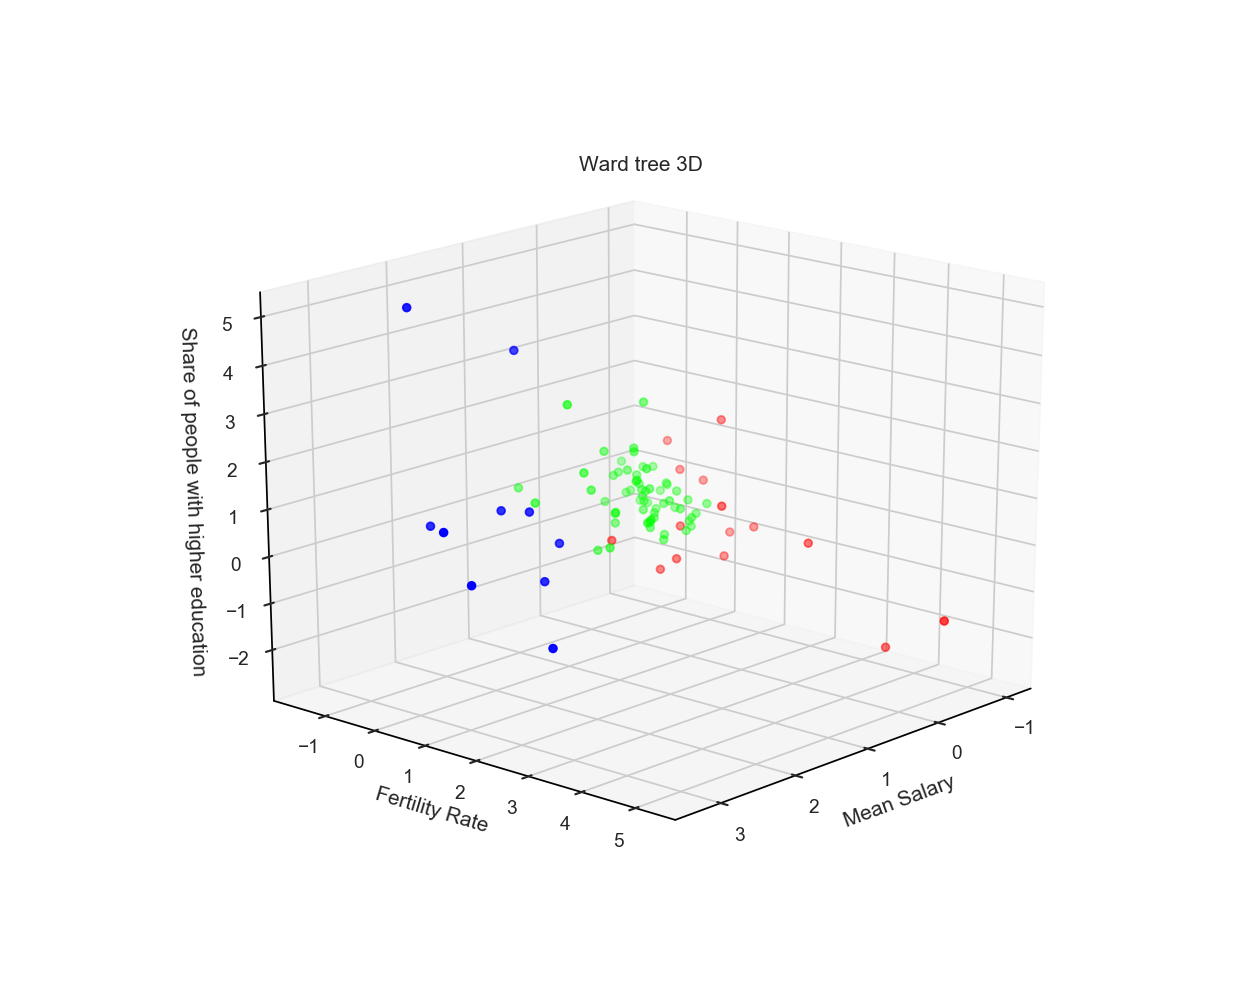

Text(0.5, 0.92, 'Ward tree 3D')

In [14]:
# ward tree 3d

f = plt.figure()
ax = f.add_subplot(111, projection = '3d')

ax.scatter(new_x[:, 1], new_x[:, 8], new_x[:, 0], c=clll, s=20, cmap='brg');
ax.set_xlabel('Mean Salary')
ax.set_ylabel('Fertility Rate')
ax.set_zlabel('Share of people with higher education')
ax.set_title('Ward tree 3D')
#plt.savefig('ward tree_3d.png')

In [15]:
df['labels'] = y_hc
df.groupby('labels').mean()

,Population вensity per km2,Total population,Total population per 1k,Share of people with higher education. 2010. %,Median salary. 2019. rubles,Unemployment rate. 2017. %,Share of poor people. 2017. %,Gross regional product per capita. 2016. rubles,Terrorist_crimes_2017,Murders and attempted murders. 2017,Criminal possesion of weapons. 2017,Fertility rate. 2017,Museum attendance. 2010. per pop,"Share of people using internet everyday, 2016, %"
labels,,,,,,,,,,,,,,
0,36.347333,8.385516e+05,838.551600,17.933333,26195.133333,11.840000,22.666667,18077.092000,0.597333,1.162,4.460000,1.960000,0.271333,43.650860
1,880.901000,2.230308e+06,2230.308000,24.800000,65490.100000,4.320000,12.020000,161053.062000,0.059000,1.063,2.616000,1.848000,0.969300,56.908660
2,39.108333,1.871987e+06,1871.987417,20.016667,30410.283333,5.436667,14.068333,30071.562667,0.059000,0.674,1.770667,1.571333,0.604200,43.230613
